In [4]:
import qiskit

In [5]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.6',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.15.0'}

In [6]:
from qiskit import IBMQ

In [7]:
IBMQ.save_account('4eb9b7f945020d8a9856c0f0e74c53ba48cbe0f3740dda1c0cb5a15240cf82330940fdef3a406c118662945b55e2655807948f63dd7ff57343d6fb491cd121b9')

Credentials already present. Set overwrite=True to overwrite.


In [8]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
from qiskit import *

In [10]:
qr = QuantumRegister(2)

In [11]:
cr = ClassicalRegister(2)

In [12]:
circuit = QuantumCircuit(qr, cr)

In [13]:
%matplotlib inline

In [14]:
circuit.draw()

q0_0: |0>
         
q0_1: |0>
         
 c0_0: 0 
         
 c0_1: 0

In [14]:
circuit.h(qr[0])

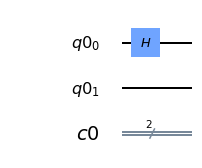

In [15]:
circuit.draw(output='mpl')

In [16]:
circuit.cx(qr[0],qr[1])

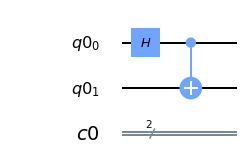

In [17]:
circuit.draw(output='mpl')

In [16]:
circuit.measure(qr, cr)

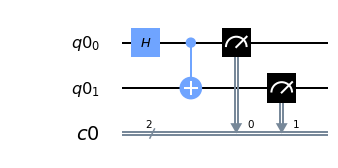

In [17]:
circuit.draw(output='mpl')

In [18]:
simulator = Aer.get_backend('qasm_simulator')

In [19]:
result = execute(circuit,backend = simulator).result()

In [18]:
from qiskit.tools.visualization import plot_histogram

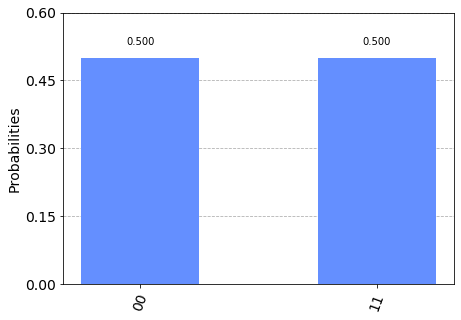

In [21]:
plot_histogram(result.get_counts(circuit))

In [22]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [26]:
provider = IBMQ.get_provider('ibm-q')

In [27]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [28]:
job = execute(circuit, backend=qcomp)

In [29]:
from qiskit.tools.monitor import job_monitor

In [30]:
job_monitor(job)

Job Status: job has successfully run


In [32]:
result = job.result()

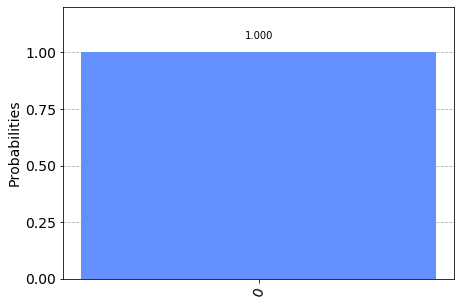

In [33]:
plot_histogram(result.get_counts(circuit))

In [34]:
from qiskit.tools.visualization import plot_bloch_multivector

[0.+0.j 1.+0.j]


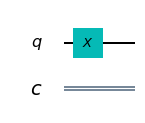

In [35]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)
%matplotlib inline
circuit.draw(output='mpl')

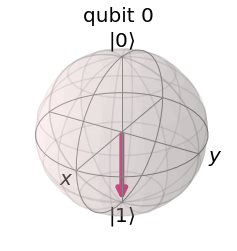

In [36]:
plot_bloch_multivector(statevector)

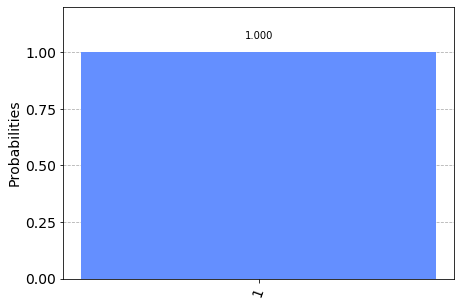

In [37]:
circuit.measure([0],[0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [15]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unitary = result.get_unitary()
print(unitary)


[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [16]:
circuit = QuantumCircuit(3, 3)

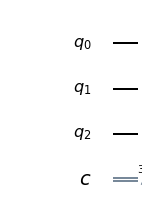

In [17]:
%matplotlib inline
circuit.draw(output = 'mpl')

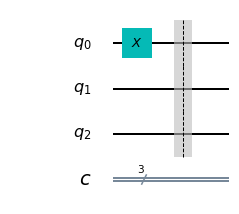

In [18]:
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

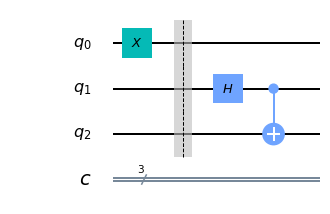

In [19]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

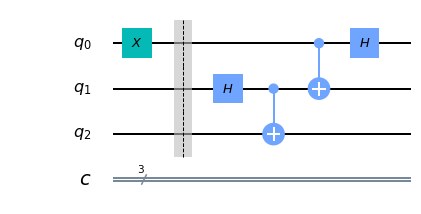

In [20]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

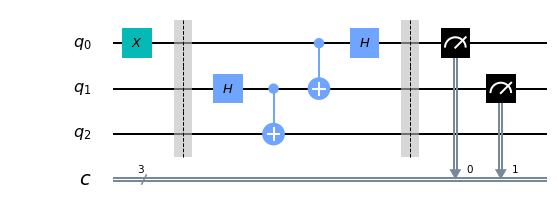

In [21]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

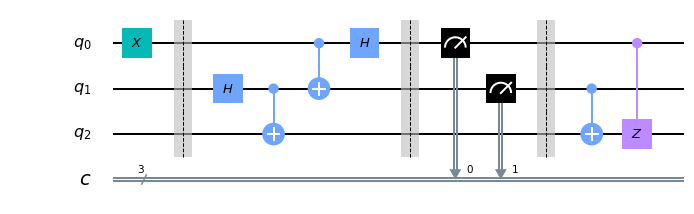

In [22]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

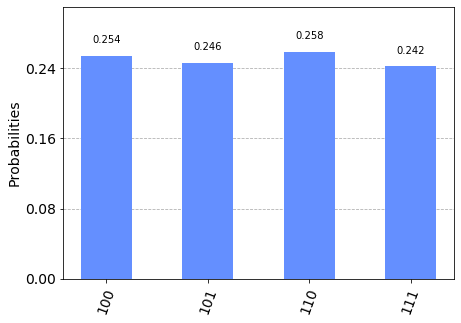

In [25]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [26]:
print(counts)

{'101': 252, '100': 260, '111': 248, '110': 264}
